In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data2=pd.read_csv(r'C:\Users\Asus\Desktop\journals csv - Copy\v2v\v2v_follow\13apr_v2v_follow\lap4.csv')
datx=pd.read_csv(r'C:\Users\Asus\Desktop\journals csv - Copy\v2v\v2v_follow\13apr_v2v_follow\lap3.csv' )
datax=pd.read_csv(r'C:\Users\Asus\Desktop\journals csv - Copy\v2r\low_moore\northbound\lap4.csv')
v2vd=pd.concat([datx,data2,datax],ignore_index=True)#datx,datax,data2


In [ ]:
v2vd.isnull().sum()

#                         0
Time in Sec               0
Time in usec              0
 Bytes sent               0
Sender latitude           0
Sender longitude          0
 Sender Speed(km/h)       0
Sender Altitude(m)        0
 Receiver latitude        0
 Receiver Longitude       0
 Receiver Speed           0
Receiver Altitude(m)      0
 Packet Received (Y/N)    0
 Bytes Received           0
 Signal Strength          0
 Noise Strength           0
dtype: int64

In [ ]:
binary_mapping = {'N': 0 ,'Y': 1}
v2vd[' Packet Received (Y/N)'] = v2vd[' Packet Received (Y/N)'].map(binary_mapping)
data=v2vd[[ ' Receiver Speed',' Packet Received (Y/N)',' Signal Strength',' Noise Strength',' Sender Speed(km/h)','Time in Sec']]

data=pd.DataFrame(data)
data.rename(columns = {data.columns[0]:' Receiver Speed', data.columns[1]:'Time in Sec',data.columns[2]:' Signal Strength',data.columns[3]:' Noise Strength',data.columns[4]:' Sender Speed(km/h)',data.columns[5]:' Packet Received (Y/N)'}, inplace = True)
x=data.drop(' Sender Speed(km/h)', axis=1)
y=data[' Sender Speed(km/h)']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

Text(0.5, 1.0, 'Global Feature Importance ')

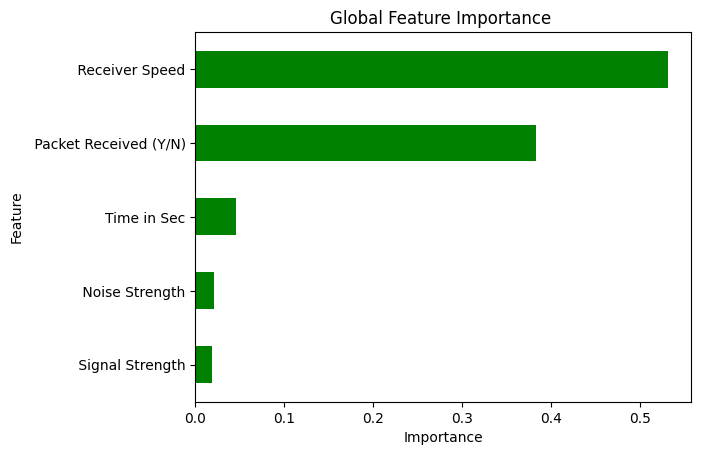

In [ ]:

import matplotlib.pyplot as plt
global_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance ")